## Imports

Import the necessary library.

In [1]:
# ! pip install eli5

In [2]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import bs4 as bs
import urllib.request
import warnings
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

## Read Data

Reading the data for all the players. The data is read in Dataframes. 

In [3]:
player15_df = pd.read_csv('./data/players_15.csv')
player16_df = pd.read_csv('./data/players_16.csv')
player17_df = pd.read_csv('./data/players_17.csv')
player18_df = pd.read_csv('./data/players_18.csv')
player19_df = pd.read_csv('./data/players_19.csv')
player20_df = pd.read_csv('./data/players_20.csv')

## Data Cleanup

The purpose of the cells below is to make sure that we drop the columns that have been identified as not to be used.

In addition to the columns indicated in the statement, the team also feels that the clubs staff capabilities do not depend on other attributes like:
1. Player Height
1. Player Weight
1. Player Nationality

So these columns have been also identified as to be dropped.

In [4]:
def clean_player_df(player_df):
    '''
    Function below takes the Dataframe and drops the columns which are specified in the list above.
    '''
    return player_df.drop(columns_to_drop, axis=1)

Cleaning up all the dataframes to remove the columns identified.

## Data Analysis

For the purpose of Data Analysis, identifying columns which are numerical would simplify the quantitative analysis of the stafs capabilities. In order to identify those columns and run some preliminary analysis like min values max values, identifying the columns which are numeric.

### Step 1: Identify Numerical Columns

#### Inference from the step:
The list above indicates that there are about 24 columns which are numerical and can be leveraged for the sake of quantitative analysis. 
However further investigation of these numerical columns indicate that some of these columns could be added to the cleanup of columns as they would not really reflect the staffs capabilities to promote talent.

#### Inference Action:
Add the columns to the list of columns to be cleaned up and remove the columns.

Columns identified:
1. value_eur
1. release_clause_eur
1. team_jersey_number
1. contract_valid_until
1. nation_jersey_number

In [5]:
columns_to_drop = ["sofifa_id", "player_url", "long_name", "wage_eur", "real_face", "height_cm", "weight_kg", "nationality", 
                    "value_eur", "release_clause_eur", "team_jersey_number", "contract_valid_until","nation_jersey_number"]

In [6]:
# Further cleanup
player15_cleaned_df = clean_player_df(player15_df)
player16_cleaned_df = clean_player_df(player16_df)
player17_cleaned_df = clean_player_df(player17_df)
player18_cleaned_df = clean_player_df(player18_df)
player19_cleaned_df = clean_player_df(player19_df)
player20_cleaned_df = clean_player_df(player20_df)

In [7]:
player15_cleaned_df.head()

,short_name,age,dob,club,overall,potential,player_positions,preferred_foot,international_reputation,weak_foot,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,27,1987-06-24,FC Barcelona,93,95,CF,Left,5,3,...,62+3,62+3,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3
1,Cristiano Ronaldo,29,1985-02-05,Real Madrid,92,92,"LW, LM",Right,5,4,...,63+3,63+3,63+3,63+3,63+3,57+3,52+3,52+3,52+3,57+3
2,A. Robben,30,1984-01-23,FC Bayern München,90,90,"RM, LM, RW",Left,5,2,...,64+3,64+3,64+3,64+3,64+3,55+3,46+3,46+3,46+3,55+3
3,Z. Ibrahimović,32,1981-10-03,Paris Saint-Germain,90,90,ST,Right,5,4,...,61+3,65+3,65+3,65+3,61+3,56+3,55+3,55+3,55+3,56+3
4,M. Neuer,28,1986-03-27,FC Bayern München,90,90,GK,Right,5,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Step 2: Analyze the Numerical Columns

In order to check the quality of data available in those numerical columns, analyzing a couple of years to see the type and quality of data. 

#### Inferences:
1. The Describe on the multiple years does indicate that the mental_composure is not a column that we can rely on as the values are not captured in the earlier years and further investigation indicated that the data has a format which is a split value (e.g. and hence can be excluded 90+3)
1. International reputation is also a Categorical variable with values 1 to 5.
1. Weak Foot is a categorical value too with values 1 to 5.
1. Numerical columns 'gk_speed', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_diving' have very few values. On inspecting the players associated with those values, it was identified that these are goal keepers and attributes for goal keepers. As the question is about effectiveness of the entire staff, the approach was to drop these columns as well both for lack of data and to avoid focus on skill development for goal keepers.

#### Inference Action
1. Remove the mentality_composure value from the columns. 
2. From domain knowledge perspective, weak foot can be eliminated as other factors would reflect if the staff has improved the weak foot score of the individual.
3. International reputation is also being dropped because we are not measuring PR teams capabilities but the teams staff.
~~
4. Remove the gk_* values from the columns list.  
5. Also as the Goal Keepers are missing the information of other attributes, we might not be able to get metrics on the staffs work on the goal keepers. 
~~

In [8]:
columns_to_drop = ["player_url", "long_name", "wage_eur", "real_face", "height_cm", "weight_kg", "nationality", 
                    "value_eur", "release_clause_eur", "team_jersey_number", "contract_valid_until","nation_jersey_number",
                      "mentality_composure", "weak_foot", "international_reputation"]

In [9]:
# Reloading the data so that we can reclean
player15_df = pd.read_csv('./data/players_15.csv')
player16_df = pd.read_csv('./data/players_16.csv')
player17_df = pd.read_csv('./data/players_17.csv')
player18_df = pd.read_csv('./data/players_18.csv')
player19_df = pd.read_csv('./data/players_19.csv')
player20_df = pd.read_csv('./data/players_20.csv')

In [10]:
# Further cleanup
player15_cleaned_df = clean_player_df(player15_df)
player16_cleaned_df = clean_player_df(player16_df)
player17_cleaned_df = clean_player_df(player17_df)
player18_cleaned_df = clean_player_df(player18_df)
player19_cleaned_df = clean_player_df(player19_df)
player20_cleaned_df = clean_player_df(player20_df)

### Skills Columns

The skills columns in the dataframe indicate the different skills with a numerical value for the Skills. The team thinks that the skills are an important part of the development of every player. The player skills once improved will contribute to the overall improvement of the player and hence its overall rating. 

#### Observations:
1. Non Numeric columns: 
The columns for skills are multiple and are non numeric. Infact the columns have values with + and - signs indicating that the columns have data which indicates positive and negative traits.

#### Observation Action:

1. The decision is to exclude the columns for the first set of determination and keep only the numeric columns in the list. 
2. Build a data frame for every year with only these numeric values in addition to columns which identify the player like name, club.


In [11]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_column_list = list(player15_cleaned_df.select_dtypes(include=numerics).columns)
print (pd.DataFrame(numeric_column_list))

                 0
0        sofifa_id
1              age
2          overall
3        potential
4      skill_moves
5             pace
6         shooting
7          passing
8        dribbling
9        defending
10          physic
11       gk_diving
12     gk_handling
13      gk_kicking
14     gk_reflexes
15        gk_speed
16  gk_positioning


#### Numerical Only Dataset

Creating a new Dataset with only numerical columns:
0          age
1      overall
2    potential
3  skill_moves
4         pace
5     shooting
6      passing
7    dribbling
8    defending
9       physic
10 short_name
11 club


In [12]:
# player_trait_columns = ["overall", "pace" "shooting","passing","dribbling" "defending"]

player_numeric_identification_columns = ['short_name', "club"] +  numeric_column_list
print (player_numeric_identification_columns)


['short_name', 'club', 'sofifa_id', 'age', 'overall', 'potential', 'skill_moves', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning']


In [13]:
player15_numeric_cleaned_df =  player15_cleaned_df[player_numeric_identification_columns]
player16_numeric_cleaned_df =  player16_cleaned_df[player_numeric_identification_columns]
player17_numeric_cleaned_df =  player17_cleaned_df[player_numeric_identification_columns]
player18_numeric_cleaned_df =  player18_cleaned_df[player_numeric_identification_columns]
player19_numeric_cleaned_df =  player19_cleaned_df[player_numeric_identification_columns]
player20_numeric_cleaned_df =  player20_cleaned_df[player_numeric_identification_columns]
numeric_column_list.remove("sofifa_id")


### Year Over Year Comparison

#### Approach
Since the purpose of the exercise is to identify the effectiveness of the staff, the approach is to identify the score differences of the players year over year. 

We are going to join data year over year and see the score differences. The approach is to create a dataframe that would have the name of the player the club and the difference in the rating of the numeric column for the player.

#### Decisions:
1. Initially the team considered only players who stayed at the club to get a guage of the players skill. However given that not many players were staying at the club, the decision was to not to enforce the stay at club metric. The credit for the increase is being assigned to the club in the earlier year.
1. The score difference will be calculated for every numeric parameter including the values which are categorical.

In [14]:
# Define a year over year dataframe in which the values will be stored
year_over_year_df = pd.DataFrame()
all_years_df = pd.DataFrame()
# year_over_year_df = player15_numeric_cleaned_df["short_name"]
# display(year_over_year_df)

In [15]:
def create_year_over_year_df(year1_df, year2_df, year):
    year1_year2_joined_df = year1_df.merge(year2_df, on="sofifa_id", suffixes=('_1', '_2'))
    year_over_year_df["short_name"] = year1_year2_joined_df["short_name_1"]
    year_over_year_df["club"] = year1_year2_joined_df["club_1"]
    year_over_year_df["age"] = year1_year2_joined_df["age_1"]    
    year_over_year_df["year_over_year"] = year
    for column in numeric_column_list:
        year_over_year_df[f"diff_{column}"] = year1_year2_joined_df[f"{column}_2"] - year1_year2_joined_df[f"{column}_1"]
        year_over_year_df[column] = year1_year2_joined_df[[f"{column}_1"]]         
    return year_over_year_df
        
all_years_df = all_years_df.append(create_year_over_year_df(player15_numeric_cleaned_df, player16_numeric_cleaned_df, 2016))
all_years_df = all_years_df.append(create_year_over_year_df(player16_numeric_cleaned_df, player17_numeric_cleaned_df, 2017)) 
all_years_df = all_years_df.append(create_year_over_year_df(player17_numeric_cleaned_df, player18_numeric_cleaned_df, 2018))
all_years_df = all_years_df.append(create_year_over_year_df(player18_numeric_cleaned_df, player19_numeric_cleaned_df, 2019)) 
all_years_df = all_years_df.append(create_year_over_year_df(player19_numeric_cleaned_df, player20_numeric_cleaned_df, 2020)) 



In [16]:
all_years_df.shape

(53440, 35)

In [17]:
all_years_df.head()
numeric_column_list = list(player15_cleaned_df.select_dtypes(include=numerics).columns)
for column in numeric_column_list: 
    if (column != 'sofifa_id'):
        all_years_df[f"diff_{column}"].fillna(0) 

### Score Difference Matrix

The year over year dataframe has all the score changes for the Club for every individual player that has played for the club.

#### Approach 1
Find the number of players who have a positive change for every metric. This would mean that we create a histogram and find how many players have a positive change. We are going to only count players who have atleast one standard deviation change of positive change in rating for every metric. That will give us indication of how important is this metric in staffs contribution.
##### Decision"
Instead of only using the Players with positive score we decided to use both negative and positive scores so the clubs which are performing bad could be penalized.

#### Approach 2
For every club find the average change in ratings for each of the metrics and then order the clubs to identify which clubs have maximum change and order those clubs. This will ensure that we not only count players which are improving but also players which are losing points.
Plot the top 10 clubs that have shown the most change.

#### Approach 3
Define a Linear Regression model to determine what should be the change in the overall rating for a player at an age.

Find the change in the Players metrics. Based upon the metrics find the overall score change that is desired based upon the individual factors using a Linear Regression model. 



#### Approach 2

In [18]:
all_years_df.head()

,short_name,club,age,year_over_year,diff_age,diff_overall,overall,diff_potential,potential,diff_skill_moves,...,diff_gk_handling,gk_handling,diff_gk_kicking,gk_kicking,diff_gk_reflexes,gk_reflexes,diff_gk_speed,gk_speed,diff_gk_positioning,gk_positioning
0,L. Messi,FC Barcelona,27,2016,1,1,93,0,95,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Cristiano Ronaldo,Real Madrid,29,2016,1,1,92,1,92,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A. Robben,FC Bayern München,30,2016,1,0,90,0,90,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Z. Ibrahimović,Paris Saint-Germain,32,2016,1,-1,90,-1,90,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,M. Neuer,FC Bayern München,28,2016,1,0,90,0,90,0,...,2.0,85.0,-1.0,92.0,0.0,86.0,0.0,60.0,0.0,90.0


#### Observation:

From the graphs above we observe:
1. Players of higher ages tend to show less changes in all the metrics. Infact playersa above the age between 30 and 35 tend to show lesser changes in the skill area improvements. 
2. Younger players do tend to show higher changes in the skill profile values.
3. Certain higher values for differences might skew the data and might have to be removed.

#### Actions:
1. Age definitely plays a role in the calculation of the score changes and hence we are going to calculate the average on every age.
1. Average the score changes for a club at every age and identify the clubs which are performing better. 

In [19]:
all_years_df = all_years_df.fillna(0)

In [20]:
all_years_df.head()

,short_name,club,age,year_over_year,diff_age,diff_overall,overall,diff_potential,potential,diff_skill_moves,...,diff_gk_handling,gk_handling,diff_gk_kicking,gk_kicking,diff_gk_reflexes,gk_reflexes,diff_gk_speed,gk_speed,diff_gk_positioning,gk_positioning
0,L. Messi,FC Barcelona,27,2016,1,1,93,0,95,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Cristiano Ronaldo,Real Madrid,29,2016,1,1,92,1,92,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,A. Robben,FC Bayern München,30,2016,1,0,90,0,90,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Z. Ibrahimović,Paris Saint-Germain,32,2016,1,-1,90,-1,90,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,M. Neuer,FC Bayern München,28,2016,1,0,90,0,90,0,...,2.0,85.0,-1.0,92.0,0.0,86.0,0.0,60.0,0.0,90.0


In [21]:
year_over_year_metrics_averaged = all_years_df
year_over_year_metrics_averaged = year_over_year_metrics_averaged.drop(["short_name"], axis=1)
year_over_year_metrics_averaged = year_over_year_metrics_averaged.groupby(["club", "year_over_year"]).sum().reset_index()
year_over_year_metrics_averaged = year_over_year_metrics_averaged.dropna()

display (year_over_year_metrics_averaged.head())

,club,year_over_year,age,diff_age,diff_overall,overall,diff_potential,potential,diff_skill_moves,skill_moves,...,diff_gk_handling,gk_handling,diff_gk_kicking,gk_kicking,diff_gk_reflexes,gk_reflexes,diff_gk_speed,gk_speed,diff_gk_positioning,gk_positioning
0,SSV Jahn Regensburg,2019,509,20,38,1312,20,1395,1,46,...,2.0,128.0,2.0,127.0,1.0,145.0,0.0,76.0,11.0,116.0
1,SSV Jahn Regensburg,2020,603,23,11,1539,-2,1606,1,53,...,3.0,130.0,0.0,129.0,0.0,146.0,0.0,76.0,2.0,127.0
2,1. FC Heidenheim 1846,2016,392,16,61,1004,51,1064,0,36,...,4.0,63.0,3.0,60.0,6.0,66.0,0.0,47.0,4.0,64.0
3,1. FC Heidenheim 1846,2017,509,21,46,1360,7,1472,0,48,...,1.0,129.0,0.0,121.0,0.0,143.0,0.0,94.0,0.0,135.0
4,1. FC Heidenheim 1846,2018,526,22,30,1456,9,1569,0,52,...,1.0,125.0,9.0,114.0,6.0,133.0,0.0,89.0,4.0,127.0


In [22]:
# Finding Clubs which have done better in all age group
sortable_columns = []
for column in all_years_df.columns:
    if ("diff_" in column and column != "diff_age"):
        sortable_columns.append(column)
best_clubs_any_year = year_over_year_metrics_averaged.sort_values(by=sortable_columns, ascending = False).head(10)
display (best_clubs_any_year)

,club,year_over_year,age,diff_age,diff_overall,overall,diff_potential,potential,diff_skill_moves,skill_moves,...,diff_gk_handling,gk_handling,diff_gk_kicking,gk_kicking,diff_gk_reflexes,gk_reflexes,diff_gk_speed,gk_speed,diff_gk_positioning,gk_positioning
1000,Eskişehirspor,2016,565,23,135,1468,113,1572,2,54,...,23.0,231.0,13.0,234.0,28.0,258.0,0.0,198.0,39.0,230.0
2318,Real Sporting de Gijón,2016,534,24,124,1482,104,1609,1,52,...,11.0,191.0,11.0,185.0,4.0,212.0,-10.0,174.0,23.0,172.0
2249,RCD Espanyol,2016,641,28,122,1814,93,1943,-1,63,...,19.0,201.0,16.0,186.0,15.0,205.0,0.0,146.0,17.0,196.0
3014,Vitória Guimarães,2016,494,21,120,1372,93,1493,0,48,...,-1.0,135.0,3.0,138.0,7.0,144.0,9.0,72.0,10.0,137.0
2096,Palermo,2016,661,26,119,1754,77,1889,0,56,...,3.0,189.0,-3.0,171.0,9.0,206.0,0.0,133.0,16.0,188.0
991,Envigado FC,2016,443,19,112,1132,102,1254,3,39,...,8.0,121.0,12.0,110.0,0.0,133.0,0.0,81.0,15.0,118.0
1298,Frosinone,2016,469,19,109,1133,115,1192,1,41,...,6.0,174.0,6.0,162.0,7.0,189.0,0.0,139.0,1.0,180.0
606,Carpi,2016,442,20,109,1240,68,1403,0,47,...,5.0,68.0,3.0,58.0,-3.0,82.0,0.0,36.0,3.0,68.0
981,Empoli,2016,564,23,104,1544,74,1662,0,55,...,4.0,132.0,1.0,120.0,12.0,142.0,0.0,84.0,6.0,140.0
2241,RC Celta,2016,577,25,102,1722,96,1851,0,59,...,5.0,206.0,7.0,194.0,13.0,195.0,0.0,150.0,3.0,194.0


## Test and Train Set

The problem states that we are using the data from the Division 1 European League. In order to make that happen for the data that we have cleaned up, we are going to separate the data for the clubs into Train set belonging to the players from the league.

#### Steps:
1. Investigation of the dataset has indicated that the League information is not in the data file and needs to be fetched from the web using the scraping approach.
2. Once the scraping pulls data the data is going to be appended to the club score changes dataframe. 

#### Model Options
1. Linear Model using fixed values based upon the score changes.
2. Linear Model but instead of using fixed values use the coefficients of the linear equation that generates the overall score and then assign the score based upon the coefficient values.


#### Approach:
1. Read the Club Data and the Leagues data files
2. Match the club and the leagues in which the clubs play
3. Create a test data set and a train dataset by excluding the the clubs that are associated with the Leagues marked as Test data.


### Web Scraping

The leagues and teams dataset does not have any correlation with the clubs that play in a league and hence we need to scrape that data from the sofifa site.
The url field in the dataset can be used to make a web request and then download the data.

In [23]:
import requests
def parseTeamNameFromUrl(team_url_id):

    source = requests.get(f"https://sofifa.com/team/{team_url_id}")
    soup = bs.BeautifulSoup(source.content)
    team_info_divs = soup.findAll("div", {"class": "info"})
    team_name = 'not found'
    for div in team_info_divs:
        team_name = div.find("h1").text 
    print (f"Processing {team_name}")
    return team_name

In [24]:
parseTeamNameFromUrl(10030)

Processing SC Paderborn 07


'SC Paderborn 07'

#### Web Scraping End

Once the web scraping is done we do not intend to save the file and no need to keep running the scraping every execution. This is the lambda based approach to make a call to every row and pull the data. this is not done everytime and I have pulled that data down to my machine.

In [25]:
leagues_df = pd.read_csv('./data/teams_and_leagues.csv')
display(leagues_df)

,url,league_name
0,241,Spain Primera Division
1,11,English Premier League
2,5,English Premier League
3,243,Spain Primera Division
4,1,English Premier League
...,...,...
1075,326,Turkish Süper Lig
1076,190,Italian Serie A
1077,448,Spain Primera Division
1078,8,English League Championship


# WEB SCRAPING - SLOW STEP
<div class="alert alert-block alert-danger">

This is a long running steps that gets the details of the League a Club plays in using the Web Scraping method.
</div>

In [26]:
# leagues_df["club"] = leagues_df.apply(lambda x: parseTeamNameFromUrl(x['url']),axis=1)


In [27]:
# leagues_df.to_csv('./data/teams_leagues_clubs.csv', index=False)
# display(leagues_df)


In [28]:
leagues_with_club_df = pd.read_csv('./data/teams_leagues_clubs.csv')
display(leagues_with_club_df)

,url,league_name,club
0,241,Spain Primera Division,FC Barcelona
1,11,English Premier League,Manchester United
2,5,English Premier League,Chelsea
3,243,Spain Primera Division,Real Madrid
4,1,English Premier League,Arsenal
...,...,...,...
1075,326,Turkish Süper Lig,Fenerbahçe SK
1076,190,Italian Serie A,Brescia
1077,448,Spain Primera Division,Athletic Club de Bilbao
1078,8,English League Championship,Leeds United


Add the league information into the dataframe to be able to sort the data.

In [29]:
year_over_year_metrics_averaged_with_leagues = year_over_year_metrics_averaged.merge(leagues_with_club_df, on="club", suffixes=('_1', '_2'))
display(year_over_year_metrics_averaged_with_leagues[["club", "year_over_year", "overall", "diff_overall", "skill_moves", "diff_skill_moves"]])

,club,year_over_year,overall,diff_overall,skill_moves,diff_skill_moves
0,1. FC Heidenheim 1846,2016,1004,61,36,0
1,1. FC Heidenheim 1846,2017,1360,46,48,0
2,1. FC Heidenheim 1846,2018,1456,30,52,0
3,1. FC Heidenheim 1846,2019,1547,16,55,-1
4,1. FC Heidenheim 1846,2020,1549,33,54,0
...,...,...,...,...,...,...
3390,Örebro SK,2019,780,15,28,1
3391,Örebro SK,2020,648,2,21,0
3392,Östersunds FK,2018,954,39,32,2
3393,Östersunds FK,2019,1172,16,40,1


In [30]:
# Simple Scoring
year_over_year_metrics_averaged_with_leagues_aggregated_over_all_years = year_over_year_metrics_averaged_with_leagues.groupby(["club"]).sum().reset_index()
year_over_year_metrics_averaged_with_leagues_aggregated_over_all_years

,club,year_over_year,age,diff_age,diff_overall,overall,diff_potential,potential,diff_skill_moves,skill_moves,...,gk_handling,diff_gk_kicking,gk_kicking,diff_gk_reflexes,gk_reflexes,diff_gk_speed,gk_speed,diff_gk_positioning,gk_positioning,url
0,1. FC Heidenheim 1846,10090,2580,105,186,6916,57,7391,-1,245,...,582.0,12.0,535.0,13.0,627.0,0.0,414.0,11.0,598.0,556175
1,1. FC Kaiserslautern,10090,2192,93,85,6220,-27,6734,9,213,...,432.0,5.0,429.0,12.0,472.0,-12.0,251.0,15.0,408.0,145
2,1. FC Köln,10090,2801,115,90,8251,-15,8791,4,278,...,922.0,7.0,895.0,13.0,944.0,-11.0,606.0,14.0,910.0,155
3,1. FC Magdeburg,4039,939,38,25,2511,4,2662,-4,88,...,192.0,-1.0,180.0,0.0,208.0,0.0,109.0,1.0,187.0,221176
4,1. FC Nürnberg,10090,2722,110,69,7557,-62,8076,6,267,...,791.0,-7.0,753.0,-5.0,861.0,-14.0,467.0,-9.0,791.0,855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,Zenit St. Petersburg,8070,1991,75,44,5653,-12,5859,2,192,...,519.0,8.0,506.0,9.0,555.0,0.0,311.0,-1.0,523.0,403076
820,Çaykur Rizespor,8071,1481,58,60,3910,2,4133,0,143,...,443.0,18.0,422.0,17.0,482.0,6.0,337.0,21.0,447.0,404148
821,Évian Thonon Gaillard FC,4033,826,33,75,2171,61,2311,1,78,...,189.0,5.0,180.0,3.0,206.0,-3.0,106.0,4.0,196.0,222542
822,Örebro SK,10090,1925,75,100,4701,30,4930,5,165,...,425.0,31.0,396.0,8.0,492.0,-22.0,256.0,24.0,426.0,3525


## Helper Code

In [31]:
# Since we are splitting based upon data points and not a percentage, this method would get the x and y train sets
def train_test_split_custom():
    club_test_set = year_over_year_metrics_averaged_with_leagues[year_over_year_metrics_averaged_with_leagues['league_name'].isin(["English Premier League ", "German 1. Bundesliga ", "French Ligue 1 ", "Spain Primera Division ", "Italian Serie A "])]

    club_train_set = year_over_year_metrics_averaged_with_leagues[~year_over_year_metrics_averaged_with_leagues['league_name'].isin(["English Premier League ", "German 1. Bundesliga ", "French Ligue 1 ", "Spain Primera Division ", "Italian Serie A "])]

#     x_train = club_train_set.drop(["club","year_over_year","age","diff_age","diff_overall","league_name"], axis=1)
#     y_train = club_train_set["diff_overall"]

#     x_test = club_test_set.drop(["club","year_over_year","age","diff_age","diff_overall","league_name"], axis=1)
#     y_test = club_test_set["diff_overall"]
    
    x_train = club_train_set.drop(["club","diff_age","diff_overall","league_name", "url"], axis=1)
    y_train = club_train_set["diff_overall"]

    x_test = club_test_set.drop(["club","diff_age","diff_overall","league_name", "url"], axis=1)
    y_test = club_test_set["diff_overall"]    
    
    return club_train_set, club_test_set, x_train, y_train, x_test, y_test

In [32]:
def generate_scored_df( train_df, test_df):
    
    club_test_set_results = test_df.copy()
    # Difference between the model times the diff overall
    # club_test_set_results["score"] = club_test_set_results["diff_overall"] *  (club_test_set_results["diff_overall"] - club_test_set_results["predicted"]) 
    # Product of predicted versus overall
    # club_test_set_results["score"] = club_test_set_results["diff_overall"] * club_test_set_results["predicted"] 
    # Difference between predicted versus overall
    # club_test_set_results["score"] = (club_test_set_results["diff_overall"] - club_test_set_results["predicted"]) 
    # Difference between the model and sum of diff overall
    club_test_set_results["score"] = club_test_set_results["diff_overall"] + (club_test_set_results["diff_overall"] - club_test_set_results["predicted"]) 
    club_test_set_results["score_raw"] = club_test_set_results["score"]
    club_test_set_results = club_test_set_results.drop(["year_over_year", "diff_age"], axis=1)    
    club_test_set_results = club_test_set_results.groupby(["club"]).mean().reset_index()
#     cols_to_norm = ['score']
#     club_test_set_results[cols_to_norm] = club_test_set_results[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
#     club_test_set_results[cols_to_norm] = club_test_set_results[cols_to_norm] * 100
    
    club_test_set_results[['score']] = MinMaxScaler().fit_transform(club_test_set_results[['score']])
    club_test_set_results['score'] = club_test_set_results['score'] * 100
    
    club_train_set_results = train_df.copy()
    # Difference between the model times the diff overall
    # club_train_set_results["score"] = club_train_set_results["diff_overall"] *  (club_train_set_results["diff_overall"] - club_train_set_results["predicted"])
    # Difference between the model times the diff overall
    club_train_set_results["score"] = club_train_set_results["diff_overall"] +  (club_train_set_results["diff_overall"] - club_train_set_results["predicted"])    
    # Product of predicted versus overall
    # club_train_set_results["score"] = club_train_set_results["diff_overall"] * club_train_set_results["predicted"] 
    # Difference between predicted versus overall
    # club_train_set_results["score"] = (club_train_set_results["diff_overall"] - club_train_set_results["predicted"])    
    club_train_set_results["score_raw"] = club_train_set_results["score"]

    club_train_set_results = club_train_set_results.drop(["year_over_year", "diff_age"], axis=1)
    club_train_set_results = club_train_set_results.groupby(["club"]).mean().reset_index()
#     cols_to_norm = ['score']
#     club_train_set_results[cols_to_norm] = club_train_set_results[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
#     club_train_set_results[cols_to_norm] = club_train_set_results[cols_to_norm] * 100
    club_train_set_results[['score']] = MinMaxScaler().fit_transform(club_train_set_results[['score']])
    club_train_set_results['score'] = club_train_set_results['score'] * 100

    
    return club_train_set_results, club_test_set_results

### Scoring Approach

The function here enumerates the scoring approaches and provides a method to select the approach. Default method is to use the difference overall + (difference overall - predicted difference overall)

In [33]:
from enum import Enum
class ScoreApproach(Enum):
    DIFF_OVERALL_TIMES_DIFFERENCE = 1
    DIFF_OVERALL_TIMES_PREDICTED = 2
    DIFF_OVERALL_PLUS_DIFFERENCE = 3
    OVERALL_PLUS_DIFF_OVERALL_PLUS_DIFFERENCE = 4
    DIFF_OVERALL_PREDICTED = 5

In [34]:
def generate_scored_with_approach_selection_df( train_df, test_df, score_approach=ScoreApproach.DIFF_OVERALL_PLUS_DIFFERENCE):
    
    club_test_set_results = test_df.copy()
    if (score_approach == ScoreApproach.DIFF_OVERALL_TIMES_DIFFERENCE):
        # Difference between the model times the diff overall
        club_test_set_results["score"] = club_test_set_results["diff_overall"] *  (club_test_set_results["diff_overall"] - club_test_set_results["predicted"]) 
    elif (score_approach == ScoreApproach.DIFF_OVERALL_TIMES_PREDICTED):
        # Product of predicted versus overall
        club_test_set_results["score"] = club_test_set_results["diff_overall"] * club_test_set_results["predicted"] 
    elif (score_approach == ScoreApproach.DIFF_OVERALL_PLUS_DIFFERENCE):
        # Difference between the model and sum of diff overall
        club_test_set_results["score"] = club_test_set_results["diff_overall"] +  (club_test_set_results["diff_overall"] - club_test_set_results["predicted"]) 
    elif (score_approach == ScoreApproach.OVERALL_PLUS_DIFF_OVERALL_PLUS_DIFFERENCE):
        # Difference between the model and sum of diff overall
        club_test_set_results["score"] = club_test_set_results["overall"] + club_test_set_results["diff_overall"] +  (club_test_set_results["diff_overall"] - club_test_set_results["predicted"])         
    elif (score_approach == ScoreApproach.DIFF_OVERALL_PREDICTED):
        # Difference between the model and sum of diff overall
        club_test_set_results["score"] = (club_test_set_results["diff_overall"] - club_test_set_results["predicted"])         

    club_test_set_results["score_raw"] = club_test_set_results["score"]
    club_test_set_results = club_test_set_results.drop(["year_over_year", "diff_age"], axis=1)    
    club_test_set_results = club_test_set_results.groupby(["club"]).mean().reset_index()
    # Normalize between 1 and 100
    club_test_set_results[['score']] = MinMaxScaler().fit_transform(club_test_set_results[['score']])
    club_test_set_results['score'] = club_test_set_results['score'] * 100
    
    club_train_set_results = train_df.copy()
    if (score_approach == ScoreApproach.DIFF_OVERALL_TIMES_DIFFERENCE):
        # Difference between the model times the diff overall
        club_train_set_results["score"] = club_train_set_results["diff_overall"] *  (club_train_set_results["diff_overall"] - club_test_set_results["predicted"]) 
    elif (score_approach == ScoreApproach.DIFF_OVERALL_TIMES_PREDICTED):
        # Product of predicted versus overall
        club_train_set_results["score"] = club_train_set_results["diff_overall"] * club_train_set_results["predicted"] 
    elif (score_approach == ScoreApproach.DIFF_OVERALL_PLUS_DIFFERENCE):
        # Difference between the model and sum of diff overall
        club_train_set_results["score"] = club_train_set_results["diff_overall"] +  (club_train_set_results["diff_overall"] - club_test_set_results["predicted"]) 
    elif (score_approach == ScoreApproach.OVERALL_PLUS_DIFF_OVERALL_PLUS_DIFFERENCE):
        # Difference between the model and sum of overall
        club_train_set_results["score"] = club_train_set_results["overall"] + club_train_set_results["diff_overall"] +  (club_train_set_results["diff_overall"] - club_train_set_results["predicted"])         
    elif (score_approach == ScoreApproach.DIFF_OVERALL_PREDICTED):
        # Difference between the model and sum of diff overall
        club_train_set_results["score"] = (club_train_set_results["diff_overall"] - club_train_set_results["predicted"])  
        
    club_train_set_results["score_raw"] = club_train_set_results["score"]

    club_train_set_results = club_train_set_results.drop(["year_over_year", "diff_age"], axis=1)
    club_train_set_results = club_train_set_results.groupby(["club"]).mean().reset_index()
    # Normalize between 1 to 100
    club_train_set_results[['score']] = MinMaxScaler().fit_transform(club_train_set_results[['score']])
    club_train_set_results['score'] = club_train_set_results['score'] * 100
    return club_train_set_results, club_test_set_results

### Model Analysis and Visualization Helpers

In [35]:
def displayModelTestScoreAgeScatter(club_test_set_model):
    plt.scatter(club_test_set_model["age"], club_test_set_model["score"])
    plt.xlabel("Age")
    plt.ylabel("Score")
    plt.title("Club Scores at different Ages")
    plt.show()

def displayModelTestScoreClubHistogram(club_test_set_model):
    plt.hist(club_test_set_model["score"], bins=20)
    plt.xlabel("Score")
    plt.ylabel("Number of Clubs")
    plt.title("Histogram showing number of clubs ")
    plt.show()
    
def displayModelTestScoreClubHistogramByLeague(club_test_set_model):
    league_names = club_test_set_model.league_name.unique()
    league_scores = []
    for league_name in league_names:
        league_scores.append(club_test_set_model[club_test_set_model["league_name"] == league_name]["score"].values)

    plt.figure(figsize=(20,10))
    plt.hist(league_scores, bins = 10, histtype='bar', label=league_names)
    plt.xlabel("Score")
    plt.ylabel("Number of Clubs")

    plt.legend()
    plt.show()

def displayTop10ClubsForEachAge(club_test_set_model):

#     fig, axs = plt.subplots(5,3,figsize=(32,16))
#     collabel=("Club", "Score")
#     i = 0
#     j = 0
#     for i in [0,1,2,3,4]: 
#         for j in [0,1,2]:
#             axs[i][j].axis('tight')
#             axs[i][j].axis('off')
#             age = i*3+j+16
#             club_test_data_for_age = club_test_set_model[club_test_set_model["age"] == age].sort_values(by="score", ascending = False).head(10)
#             outof = len(club_test_set_model[club_test_set_model["age"] == age])
#             result = club_test_data_for_age[["club","score"]]
#             result['score'] = result['score'].map('{:.4f}'.format)
#             axs[i][j].table(cellText=result.values, colLabels=collabel, loc='center',colWidths=[0.3 for x in collabel])
#             axs[i][j].set_title(f"Clubs identified as top {len(club_test_data_for_age)} out of {outof} for Age - {age} ")

    plt.show()
    
def displayBestClubsOverAllAges(club_test_set_model, top_n = 10):
    # Finding the Clubs that performed best overall at all ages
    club_test_set_model = club_test_set_model.drop_duplicates()
#     all_ages_club_df = pd.DataFrame()
#     for age in range(16, 41):
#         club_test_data_for_age = club_test_set_model[club_test_set_model["age"] == age].sort_values(by="score", ascending = False).head(10)
#         all_ages_club_df=all_ages_club_df.append(club_test_set_model, ignore_index=True)

#     all_ages_club_mean_scores_df = club_test_set_model.groupby(by=["club"]).mean()[["score"]]
    all_ages_club_mean_scores_df = club_test_set_model[["club", "diff_overall", "predicted",  "score_raw",  "score"]]

    result_df = all_ages_club_mean_scores_df.sort_values(by="score", ascending=False)
    print (f"Top {top_n} Clubs")
    display(result_df.head(top_n))

## Prediction Models

The Scoring Approach is to train a model on the difference of the overall score of the club for all the parameters. Once the model is trained predict the overall score improvements anticipated from the other factors for the club. If the overall predicted score is greater then give the team a positive score else give the team a negative score. Normalize the scores on a scale of 100. In order to predict the scores we have used 3 models - Linear, Linear with Ridge and Random Forests

### Linear Regression Model

#### Model Definition

In [36]:
scores = []
names = []

In [37]:
club_train_set, club_test_set, x_train, y_train, x_test, y_test = train_test_split_custom()

linreg = LinearRegression()
linreg.fit(x_train, y_train)

y_train_pred = linreg.predict(x_train)
y_test_pred = linreg.predict(x_test)

# predicted_test_score_improvement = year_over_year_metrics_averaged[["club","diff_overall"]]
club_train_set["predicted"] = y_train_pred
club_test_set["predicted"] = y_test_pred

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)


print ("Basic Linear Regression\n")
print (f"Train MSE basic Linear Regression: {mse_train:.4f}")
print (f"Test MSE basic Linear Regression: {mse_test:.4f}")

# accuracy_train = accuracy_score(y_train.values, y_train_pred)
# accuracy_test = accuracy_score(y_test.values, y_test_pred)
# print (f"Train Accuracy basic Linear Regression: {accuracy_train:.4f}")
# print (f"Test Accuracy basic Linear Regression: {accuracy_train:.4f}")

r2 = r2_score(y_test, y_test_pred)
print (f"R2 values of Basic Linear Reqression: {r2:.4f}")

club_train_lin = club_train_set.copy()
club_test_lin = club_test_set.copy()

names.append('Linear Regression - Basic')
scores.append([mse_train, mse_test, r2])


Basic Linear Regression

Train MSE basic Linear Regression: 29.3422
Test MSE basic Linear Regression: 62.9397
R2 values of Basic Linear Reqression: 0.8909


<ipython-input-37-8b4a36dce692>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  club_train_set["predicted"] = y_train_pred
<ipython-input-37-8b4a36dce692>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  club_test_set["predicted"] = y_test_pred


### Linear Model Ridge Regularization 

In [38]:
club_train_set, club_test_set, x_train, y_train, x_test, y_test = train_test_split_custom()

maxdeg = 2
x_poly_train = PolynomialFeatures(maxdeg).fit_transform(x_train)
x_poly_test = PolynomialFeatures(maxdeg).fit_transform(x_test)
alpha_list = [0.001, 0.01, 0.1]
best_parameter = 0.01
# # Create two lists for training and validation error
# training_error, validation_error = [],[]
# for i in alpha_list:

#     print (i)
#     ridge_reg = Ridge(alpha=i,normalize=True)

#     #Fit on the entire data because we just want to see the trend of the coefficients

#     ridge_reg.fit(x_poly_train, y_train)
    
#     # Perform cross validation on the modified data with neg_mean_squared_error as the scoring parameter and cv=5
#     # Remember to get the train_score
#     ridge_cv = cross_validate(ridge_reg, x_poly_train, y_train, cv=5,scoring='neg_mean_squared_error',return_train_score=True)

#     # Compute the training and validation errors got after cross validation
#     mse_train = np.mean(np.abs(ridge_cv["train_score"]))
#     mse_val = np.mean(np.abs(ridge_cv["test_score"]))

#     # Append the MSEs to their respective lists 
#     training_error.append(mse_train)
#     validation_error.append(mse_val)
    
#     print(f"done {i}")
    
# # Get the best mse from the validation_error list
# best_mse  =  min(validation_error)

# # Get the best alpha value based on the best mse
# best_parameter = alpha_list[validation_error.index(best_mse)]
# print (best_parameter)


In [39]:
ridge_reg = Ridge(alpha=best_parameter,normalize=True)

#Fit on the entire data because we just want to see the trend of the coefficients

ridge_reg.fit(x_poly_train, y_train)

y_train_pred = ridge_reg.predict(x_poly_train)
y_test_pred = ridge_reg.predict(x_poly_test)

In [40]:
# predicted_test_score_improvement = year_over_year_metrics_averaged[["club","diff_overall"]]

club_train_set["predicted"] = y_train_pred
club_test_set["predicted"] = y_test_pred

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print (f"Train MSE for Ridge Model {mse_train:.4f}")
print (f"Test MSE for Ridge Model {mse_test:.4f}")

r2 = r2_score(y_test, y_test_pred)
print (f"R2 for Ridge Model: {r2:.4f}")

names.append('Linear Regression - Ridge')
scores.append([mse_train, mse_test, r2])

club_train_lin_reg = club_train_set.copy()
club_test_lin_reg = club_test_set.copy()

Train MSE for Ridge Model 26.4267
Test MSE for Ridge Model 81.8029
R2 for Ridge Model: 0.8581


<ipython-input-40-5fe4df33baba>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  club_train_set["predicted"] = y_train_pred
<ipython-input-40-5fe4df33baba>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  club_test_set["predicted"] = y_test_pred


### Random Forest Model 

In [41]:
club_train_set, club_test_set, x_train, y_train, x_test, y_test = train_test_split_custom()

max_depth = 10
random_state = 144
random_forest = RandomForestRegressor(max_depth=max_depth, random_state=random_state, n_estimators=250, max_features = 0.5)

# Fit the model on the training set
random_forest.fit(x_train, y_train)

RandomForestRegressor(max_depth=10, max_features=0.5, n_estimators=250,
                      random_state=144)

In [42]:
y_train_pred = random_forest.predict(x_train)
y_test_pred = random_forest.predict(x_test)

In [43]:
# predicted_test_score_improvement = year_over_year_metrics_averaged[["club","diff_overall"]]
club_train_set["predicted"] = y_train_pred
club_test_set["predicted"] = y_test_pred

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print (f"Train MSE for Random Forest {mse_train:.4f}")
print (f"Test MSE for Random Forest {mse_test:.4f}")

# accuracy_train = accuracy_score(y_train, y_train_pred)
# accuracy_test = accuracy_score(y_test, y_test_pred)
# print (f"Train Accuracy Random Forest Model: {accuracy_train:.4f}")
# print (f"Test Accuracy Random Forest Model: {accuracy_train:.4f}")

r2 = r2_score(y_test, y_test_pred)
print (f"R2 Squared value for Random Forest: {r2:.4f}")

names.append('Random Forest')
scores.append([mse_train, mse_test, r2])

Train MSE for Random Forest 9.0826
Test MSE for Random Forest 75.8865
R2 Squared value for Random Forest: 0.8684


<ipython-input-43-3fe47ff9658f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  club_train_set["predicted"] = y_train_pred
<ipython-input-43-3fe47ff9658f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  club_test_set["predicted"] = y_test_pred


In [44]:
df_results = pd.DataFrame(scores, index=names, columns=['Train MSE', 'Test MSE', "Test R2"])
df_results

,Train MSE,Test MSE,Test R2
Linear Regression - Basic,29.342241,62.939704,0.890850
Linear Regression - Ridge,26.426650,81.802902,0.858138
Random Forest,9.082558,75.886505,0.868398


<div class="alert alert-block alert-success">
From the models available we decided to pick the Random Forest which has the least train MSE and comparable Test R2. 
</div>

## Model and Scoring Approach Analysis

#### Scoring Analysis

After selecting the Random Forest as the model, we now plan to evaluate the scoring approaches and determine which is the one we like the most. 

We are going to use the scores to determine the clubs which have done.
The graphs generated are:
1. Histogram of the scores
2. A Table of Top 10 Clubs for each player age available in the Dataset

#### Random Forest - Difference Overall Plus Difference in Prediction Scoring Approach

In [45]:
club_train_set_rf_results, club_test_set_rf_results = generate_scored_with_approach_selection_df(club_train_set, club_test_set)
club_train_set_rf_results.shape

(726, 36)

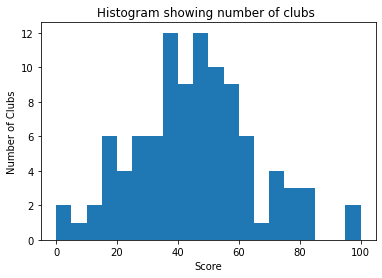

Top 10 Clubs


,club,diff_overall,predicted,score_raw,score
59,OGC Nice,55.8,50.990221,60.609779,100.000000
64,RB Leipzig,49.0,38.000730,59.999270,98.997035
60,Olympique Lyonnais,45.8,40.661410,50.938590,84.111841
9,Atalanta,48.6,47.028438,50.171562,82.851743
2,1. FSV Mainz 05,40.0,29.912745,50.087255,82.713240
67,RCD Espanyol,49.6,50.969222,48.230778,79.663357
87,TSG 1899 Hoffenheim,39.8,32.943555,46.656445,77.076988
89,Tottenham Hotspur,42.8,40.093089,45.506911,75.188495
34,FC Nantes,38.6,32.080866,45.119134,74.551442
58,Nîmes Olympique,40.2,35.996143,44.403857,73.376360


In [46]:
# displayModelTestScoreAgeScatter(club_test_set_rf_results)
displayModelTestScoreClubHistogram(club_test_set_rf_results)
displayBestClubsOverAllAges(club_test_set_rf_results)

<div class="alert alert-block alert-success">
This is the selected scoring approach and is set as default for the score generator and was also validated using some manual validation and using SME. Also the appoach displayed scores which were normally distributed on the histogram which is typical when it comes to scoring metrics.
</div>

#### Random Forest - Overall Plus Difference in Prediction Scoring Approach

In [47]:
club_train_set_rf_results, club_test_set_rf_results = generate_scored_with_approach_selection_df(club_train_set, club_test_set, ScoreApproach.OVERALL_PLUS_DIFF_OVERALL_PLUS_DIFFERENCE)


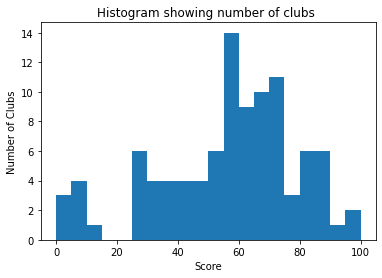

Top 10 Clubs


,club,diff_overall,predicted,score_raw,score
70,Real Madrid,39.6,43.847179,2346.752821,100.000000
52,Manchester United,20.6,23.976615,2312.223385,97.227121
7,Arsenal,24.0,24.964252,2259.235748,92.971960
94,Villarreal CF,34.0,35.363447,2215.236553,89.438614
51,Manchester City,22.2,20.399997,2215.000003,89.419618
50,Liverpool,24.2,25.878765,2209.321235,88.963585
23,Chelsea,22.8,22.955450,2198.644550,88.106196
28,Everton,13.0,15.892672,2186.507328,87.131519
14,Borussia Dortmund,28.2,23.988121,2178.811879,86.513538
71,Real Sociedad,37.2,38.749845,2152.450155,84.396565


In [48]:
# displayModelTestScoreAgeScatter(club_test_set_rf_results)
displayModelTestScoreClubHistogram(club_test_set_rf_results)
displayBestClubsOverAllAges(club_test_set_rf_results)

<div class="alert alert-block alert-danger">
This clearly resulted in clubs who were the most popular clubs with great players. However did not reflect if it had helped improve the players because the absolute value of the overall score was being considered. We hence felt the difference was important.
</div>

#### Random Forest - Diff Overall Times Difference in Prediction Scoring Approach

In [49]:
club_train_set_rf_results, club_test_set_rf_results = generate_scored_with_approach_selection_df(club_train_set, club_test_set, ScoreApproach.DIFF_OVERALL_TIMES_DIFFERENCE)

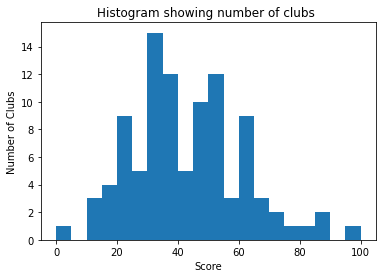

Top 10 Clubs


,club,diff_overall,predicted,score_raw,score
64,RB Leipzig,49.0,38.000730,613.997211,100.000000
15,Borussia Mönchengladbach,31.0,22.173836,504.551799,87.484239
2,1. FSV Mainz 05,40.0,29.912745,484.564345,85.198550
17,Brescia,31.2,27.705588,456.256720,81.961398
80,Sassuolo,32.4,27.014711,399.392172,75.458585
26,Dijon FCO,34.8,30.606210,394.205490,74.865456
48,Leicester City,26.4,23.466391,358.687522,70.803756
45,LOSC Lille,39.0,35.484533,334.949880,68.089210
32,FC Girondins de Bordeaux,31.2,24.262070,320.085828,66.389413
87,TSG 1899 Hoffenheim,39.8,32.943555,311.350638,65.390490


In [50]:
# displayModelTestScoreAgeScatter(club_test_set_rf_results)
displayModelTestScoreClubHistogram(club_test_set_rf_results)
displayBestClubsOverAllAges(club_test_set_rf_results)

<div class="alert alert-block alert-warning">
The multiplication over emphasized the importance of the Diff Overall and hence was rejected.
</div>

#### Random Forest - Difference in Prediction Scoring Approach

In [51]:
club_train_set_rf_results, club_test_set_rf_results = generate_scored_with_approach_selection_df(club_train_set, club_test_set, ScoreApproach.DIFF_OVERALL_PREDICTED)
club_train_set_rf_results.shape

(726, 36)

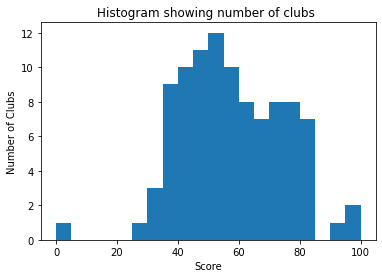

Top 10 Clubs


,club,diff_overall,predicted,score_raw,score
64,RB Leipzig,49.0,38.000730,10.999270,100.000000
2,1. FSV Mainz 05,40.0,29.912745,10.087255,96.194273
15,Borussia Mönchengladbach,31.0,22.173836,8.826164,90.931889
56,Newcastle United,15.4,8.096818,7.303182,84.576666
32,FC Girondins de Bordeaux,31.2,24.262070,6.937930,83.052517
87,TSG 1899 Hoffenheim,39.8,32.943555,6.856445,82.712486
34,FC Nantes,38.6,32.080866,6.519134,81.304931
74,SC Freiburg,23.0,16.493006,6.506994,81.254272
78,SV Werder Bremen,28.8,22.392398,6.407602,80.839518
27,Eintracht Frankfurt,29.2,22.891235,6.308765,80.427086


In [52]:
# displayModelTestScoreAgeScatter(club_test_set_rf_results)
displayModelTestScoreClubHistogram(club_test_set_rf_results)
displayBestClubsOverAllAges(club_test_set_rf_results)

<div class="alert alert-block alert-danger">
This approach heavily relied on the prediction of the model and could result in identifying clubs which if were incorrectly predicted would result in giving significant advantage to the clubs. 
</div>

### Best Clubs Overall

In [53]:
club_train_set_rf_results, club_test_set_rf_results = generate_scored_with_approach_selection_df(club_train_set, club_test_set)
displayBestClubsOverAllAges(club_test_set_rf_results)

Top 10 Clubs


,club,diff_overall,predicted,score_raw,score
59,OGC Nice,55.8,50.990221,60.609779,100.000000
64,RB Leipzig,49.0,38.000730,59.999270,98.997035
60,Olympique Lyonnais,45.8,40.661410,50.938590,84.111841
9,Atalanta,48.6,47.028438,50.171562,82.851743
2,1. FSV Mainz 05,40.0,29.912745,50.087255,82.713240
67,RCD Espanyol,49.6,50.969222,48.230778,79.663357
87,TSG 1899 Hoffenheim,39.8,32.943555,46.656445,77.076988
89,Tottenham Hotspur,42.8,40.093089,45.506911,75.188495
34,FC Nantes,38.6,32.080866,45.119134,74.551442
58,Nîmes Olympique,40.2,35.996143,44.403857,73.376360


In [54]:
club_test_set_model = club_test_set_rf_results.drop_duplicates()
all_ages_club_mean_scores_df = club_test_set_model[["club", "diff_overall", "predicted",  "score_raw",  "score"]]
result_df = all_ages_club_mean_scores_df.sort_values(by="score", ascending=False)
result_df.to_csv('./data/ordered_clubs.csv', index=False)

## Appendix

### Other Model Scores with Default Scoring Approach

#### Linear Regression Basic Model - Score Calculation and Normalization

In [55]:
club_train_set_lin_reg_results, club_test_set_lin_reg_results = generate_scored_with_approach_selection_df(club_train_lin, club_test_lin)

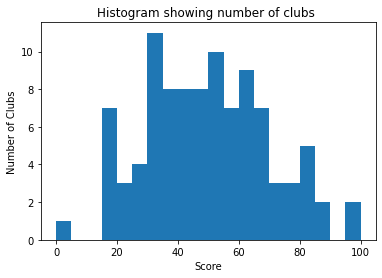

Top 10 Clubs


,club,diff_overall,predicted,score_raw,score
64,RB Leipzig,49.0,42.037677,55.962323,100.000000
59,OGC Nice,55.8,56.286434,55.313566,98.860229
9,Atalanta,48.6,47.129025,50.070975,89.649771
67,RCD Espanyol,49.6,49.647325,49.552675,88.739195
60,Olympique Lyonnais,45.8,45.668795,45.931205,82.376806
34,FC Nantes,38.6,31.437566,45.762434,82.080300
2,1. FSV Mainz 05,40.0,34.472233,45.527767,81.668025
87,TSG 1899 Hoffenheim,39.8,34.315028,45.284972,81.241470
89,Tottenham Hotspur,42.8,40.595980,45.004020,80.747879
66,RC Strasbourg Alsace,42.0,40.672890,43.327110,77.801796


In [56]:
displayModelTestScoreClubHistogram(club_test_set_lin_reg_results)
displayBestClubsOverAllAges(club_test_set_lin_reg_results)

#### Linear Ridge Model - Score Calculation and Normalization

In [57]:
club_train_set_ridge_reg_results, club_test_set_ridge_reg_results = generate_scored_with_approach_selection_df(club_train_lin_reg, club_test_lin_reg)


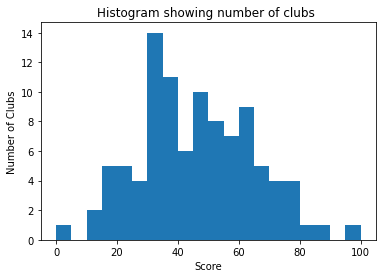

Top 10 Clubs


,club,diff_overall,predicted,score_raw,score
59,OGC Nice,55.8,51.712404,59.887596,100.000000
64,RB Leipzig,49.0,45.070760,52.929240,88.917825
9,Atalanta,48.6,47.266612,49.933388,84.146505
67,RCD Espanyol,49.6,53.341396,45.858604,77.656829
34,FC Nantes,38.6,31.723506,45.476494,77.048264
2,1. FSV Mainz 05,40.0,34.526070,45.473930,77.044181
58,Nîmes Olympique,40.2,35.968224,44.431776,75.384403
66,RC Strasbourg Alsace,42.0,40.508295,43.491705,73.887205
75,SC Paderborn 07,38.0,32.805618,43.194382,73.413676
87,TSG 1899 Hoffenheim,39.8,36.550906,43.049094,73.182283


In [58]:
displayModelTestScoreClubHistogram(club_test_set_ridge_reg_results)
displayBestClubsOverAllAges(club_test_set_ridge_reg_results)

## END OF SUBMISSION
---